<center><h1>Moore_Andrew_HW7</h1></center>

Name: Andrew Moore
<br>
Github Username: drewm80808
<br>
USC ID: 7583780941

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [315]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import hamming_loss
from scipy.spatial.distance import hamming
import statistics

### (a) Download the Anuran Calls (MFCCs) Data Set

In [302]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [112]:
# shuffling the data randomly
# reference: https://stackoverflow.com/questions/44246249/python-splitting-data-into-random-sets

train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train =train.iloc[:,:-4]
x_test =test.iloc[:,:-4]

y_family_train = train['Family']
y_genus_train = train['Genus']
y_species_train = train['Species']

y_family_test = test['Family']
y_genus_test = test['Genus']
y_species_test = test['Species']



### (b) Train a classifier for each label

#### (i) Research

reference: https://huggingface.co/spaces/evaluate-metric/exact_match
reference: https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

Exact ratio: Consider the partially correct as incorrect and then caculate accuracy
Hamming Score: It is the proportion of predicted correct labels divded by the total number of labels  and is also known as overall accuracy

#### (ii) Train a SVM for each of the labels

In [57]:
# refernece: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# reference:  https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
def svm(x_train, ylabel):
    parameters = { 'C': [0.1, 1, 10, 100, 1000], 'gamma':[0.1, 1, 10, 100,1000]}
    svc = SVC(kernel='rbf')
    estimate = GridSearchCV(estimator = svc, param_grid = parameters, cv =10)
    estimate.fit(x_train,ylabel)
    print('This iteration is for', ylabel.name)
    print('The best C and gamma are', estimate.best_params_)
    print('Best score is', estimate.best_score_)
    print('------------------------------')
    

In [58]:
svm(x_train,y_family_train)
svm(x_train,y_genus_train)
svm(x_train,y_species_train)

This iteration is for Family
The best C and gamma are {'C': 100, 'gamma': 1}
Best score is 0.9926532077377006
------------------------------
This iteration is for Genus
The best C and gamma are {'C': 100, 'gamma': 1}
Best score is 0.9896738615923507
------------------------------
This iteration is for Species
The best C and gamma are {'C': 10, 'gamma': 1}
Best score is 0.9892766417368802
------------------------------


In [73]:
def svm_test(x_train, ylabel,x_test, C, Gamma):
    svc = SVC(kernel='rbf', C=C, gamma = Gamma)
    svc.fit(x_train,ylabel)
    y_pred = svc.predict(x_test)
    return y_pred

In [105]:
# reference https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

def scores(y_true,y_pred):
    # exact match
    exact_match = np.all(y_pred == y_true, axis=1).mean()
    
    score=0
    for x in range(len(y_true)):
        
        score = score + (np.size(y_true[x] == y_pred[x]) - np.count_nonzero(y_true[x] == y_pred[x]))
    
    # multiply by 3 for the 3 different predictions
    hamm_score = score/(len(y_true)*3)
    
    return hamm_score,exact_match

In [106]:
family_pred = svm_test(x_train,y_family_train, x_test,100,1)
genus_pred = svm_test(x_train,y_genus_train, x_test,100,1)
species_pred = svm_test(x_train,y_species_train, x_test,10,1)

preds = np.concatenate([family_pred.reshape(-1,1),genus_pred.reshape(-1,1),species_pred.reshape(-1,1)],axis = 1)
y_true = pd.concat([y_family_test,y_genus_test,y_species_test],axis=1)
y_true = y_true.to_numpy()
score = scores(y_true,preds)

print('The hamming loss score is', score[0],'and the exact match score is',score[1])

The hamming loss score is 0.008337193144974525 and the exact match score is 0.9861046780917091


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [130]:
# reference:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# reference:  https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# reference: https://stackoverflow.com/questions/68683055/why-does-my-linearsvc-fail-when-i-change-the-penalty-to-l1
# standerdizing the attributes 
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(x_train)
scaled_xtest = scaler.transform(x_test)


def linear_svm_l1(x_train, ylabel):
    parameters = { 'C': [0.1, 1, 10, 100, 1000]}
    lin_svc = LinearSVC(penalty='l1',dual=False)
    estimate = GridSearchCV(estimator = lin_svc, param_grid = parameters, cv =10)
    estimate.fit(x_train,ylabel)
    print('This iteration is for', ylabel.name)
    print('The best C is', estimate.best_params_)
    print('Best score is', estimate.best_score_)
    print('------------------------------')

In [131]:
linear_svm_l1(scaled_xtrain,y_family_train)
linear_svm_l1(scaled_xtrain,y_genus_train)
linear_svm_l1(scaled_xtrain,y_species_train)

This iteration is for Family
The best C is {'C': 1}
Best score is 0.9406288459717882
------------------------------
This iteration is for Genus
The best C is {'C': 10}
Best score is 0.9525438638013192
------------------------------
This iteration is for Species
The best C is {'C': 10}
Best score is 0.9602847202499291
------------------------------


In [133]:
def linear_svm_test(x_train, ylabel,x_test, C):
    linear_svc = LinearSVC(penalty='l1',dual=False, C=C)
    linear_svc.fit(x_train,ylabel)
    y_pred = linear_svc.predict(x_test)
    return y_pred 

In [134]:
family_pred = linear_svm_test(scaled_xtrain,y_family_train, scaled_xtest,1)
genus_pred = linear_svm_test(scaled_xtrain,y_genus_train, scaled_xtest,10)
species_pred = linear_svm_test(scaled_xtrain,y_species_train, scaled_xtest,1)

preds = np.concatenate([family_pred.reshape(-1,1),genus_pred.reshape(-1,1),species_pred.reshape(-1,1)],axis = 1)
y_true = pd.concat([y_family_test,y_genus_test,y_species_test],axis=1)
y_true = y_true.to_numpy()
score = scores(y_true,preds)

print('The hamming loss score is', score[0],'and the exact match score is',score[1])

The hamming loss score is 0.05681642735834491 and the exact match score is 0.9133858267716536


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [137]:
# introducing smote

def linear_svm_l1_smote(x_train, ylabel):
    
    # introducing smote
    smote = SMOTE()
    smote_x, smote_y = smote.fit_resample(x_train,ylabel)
    
    
    parameters = { 'C': [0.1, 1, 10, 100, 1000]}
    lin_svc = LinearSVC(penalty='l1',dual=False)
    estimate = GridSearchCV(estimator = lin_svc, param_grid = parameters, cv =10)
    estimate.fit(smote_x,smote_y)
    print('This iteration is for', ylabel.name)
    print('The best C is', estimate.best_params_)
    print('Best score is', estimate.best_score_)
    print('------------------------------')



In [139]:
linear_svm_l1_smote(scaled_xtrain,y_family_train)
linear_svm_l1_smote(scaled_xtrain,y_genus_train)
linear_svm_l1_smote(scaled_xtrain,y_species_train)

This iteration is for Family
The best C is {'C': 10}
Best score is 0.9520021565553328
------------------------------
This iteration is for Genus
The best C is {'C': 10}
Best score is 0.9592967948431992
------------------------------
This iteration is for Species
The best C is {'C': 100}
Best score is 0.961667347772783
------------------------------


In [140]:
def linear_svm_test_smote(x_train, ylabel,x_test, C):
    smote = SMOTE()
    smote_x, smote_y = smote.fit_resample(x_train,ylabel)
    linear_svc = LinearSVC(penalty='l1',dual=False, C=C)
    linear_svc.fit(smote_x,smote_y)
    y_pred = linear_svc.predict(x_test)
    return y_pred 

In [141]:
family_pred = linear_svm_test_smote(scaled_xtrain,y_family_train, scaled_xtest,10)
genus_pred = linear_svm_test_smote(scaled_xtrain,y_genus_train, scaled_xtest,10)
species_pred = linear_svm_test_smote(scaled_xtrain,y_species_train, scaled_xtest,100)

preds = np.concatenate([family_pred.reshape(-1,1),genus_pred.reshape(-1,1),species_pred.reshape(-1,1)],axis = 1)
y_true = pd.concat([y_family_test,y_genus_test,y_species_test],axis=1)
y_true = y_true.to_numpy()
score = scores(y_true,preds)

print('The hamming loss score is', score[0],'and the exact match score is',score[1])

The hamming loss score is 0.07688744789254284 and the exact match score is 0.8550254747568319


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [307]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

x_values = df.iloc[:,:-4]
def k_means(x_dataframe,random_number):
    
    biggest_score = 0
    k = 0
    number_of_k = list(range(2,51))
    final_labels = 0
    for i in number_of_k:
        # preforming modeling
        k_means = KMeans(n_clusters = i,random_state= random_number)
        fitting = k_means.fit(x_dataframe)
        labels = fitting.labels_
        ss_score = silhouette_score(x_dataframe, labels)
        # seeing which is the biggest score 
        if ss_score > biggest_score:
            biggest_score = ss_score
            k = i
            final_labels = labels
    return k,final_labels

### (b) Determine which family is the majority

In [303]:
def majority_family(ylabel, labels):
    ylabel= list(ylabel)
    df_labels = pd.DataFrame(list(zip(ylabel, labels)),columns =['ylabel', 'labels'])
    
    # guessing the most common label as the class                      
    df_labels['predicted']= df_labels.groupby('labels')['ylabel'].transform(lambda S: S.mode()[0])
    y_pred = df_labels['predicted']   
    
    return y_pred 

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [299]:
# reference: https://leetcode.com/problems/hamming-distance/
# reference https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

def hamm_caclulations(y_true,y_pred):
    score=0
    for x in range(len(y_true)):
        
        score = score + (np.size(y_true[x] == y_pred[x]) - np.count_nonzero(y_true[x] == y_pred[x]))
    
    # multiply by 3 for the 3 different predictions
    hamm_loss = score/(len(y_true)*3)
    hamm_score = 1-hamm_loss
    
    # now caculating hamming distance 
    hamm_distance = 3* hamm_loss
    
    return hamm_loss, hamm_score,hamm_distance

In [314]:
avg_hamming_distance= []
y_family= df['Family']
y_genus = df['Genus']
y_species = df['Species']  

for i in range(1,51,1):
    pred = k_means(x_values,i)
    clusters = pred[1]
    
    # getting the predictions off of majority rule
    y_fam = majority_family(y_family,clusters)
    y_gen = majority_family(y_genus,clusters)
    y_spec = majority_family(y_species,clusters)
    
    # now getting the hamming scores by comparing the two
    preds = pd.concat([y_fam,y_gen,y_spec],axis = 1)
    preds = preds.to_numpy()
    y_true = pd.concat([y_family,y_genus,y_species],axis=1)
    y_true = y_true.to_numpy()
    score = hamm_caclulations(y_true,preds)
    # appending to a list 
    avg_hamming_distance.append(score[2])
    # creating an output
    print('------------------------------')
    print("The K Chose for Iteration",i,'Was',pred[0])
    print('The hamming loss was', score[0])
    print('The hamming score was', score[1])
    print('The Hamming Distance was', score[2])
    print('------------------------------')
    
    
    

------------------------------
The K Chose for Iteration 1 Was 4
The hamming loss was 0.2224229789205467
The hamming score was 0.7775770210794533
The Hamming Distance was 0.66726893676164
------------------------------
------------------------------
The K Chose for Iteration 2 Was 4
The hamming loss was 0.24526291406069028
The hamming score was 0.7547370859393097
The Hamming Distance was 0.7357887421820708
------------------------------
------------------------------
The K Chose for Iteration 3 Was 4
The hamming loss was 0.2224229789205467
The hamming score was 0.7775770210794533
The Hamming Distance was 0.66726893676164
------------------------------
------------------------------
The K Chose for Iteration 4 Was 4
The hamming loss was 0.2224229789205467
The hamming score was 0.7775770210794533
The Hamming Distance was 0.66726893676164
------------------------------
------------------------------
The K Chose for Iteration 5 Was 4
The hamming loss was 0.2224229789205467
The hamming scor

In [319]:
# reference: https://stackoverflow.com/questions/15389768/standard-deviation-of-a-list

print('Std of all 50 runs is', statistics.stdev(avg_hamming_distance))
print('Mean of all 50 runs is',statistics.mean(avg_hamming_distance))

Std of all 50 runs is 0.03132837006265028
Mean of all 50 runs is 0.6712077831827657


## 3. ISLR 12.6.2

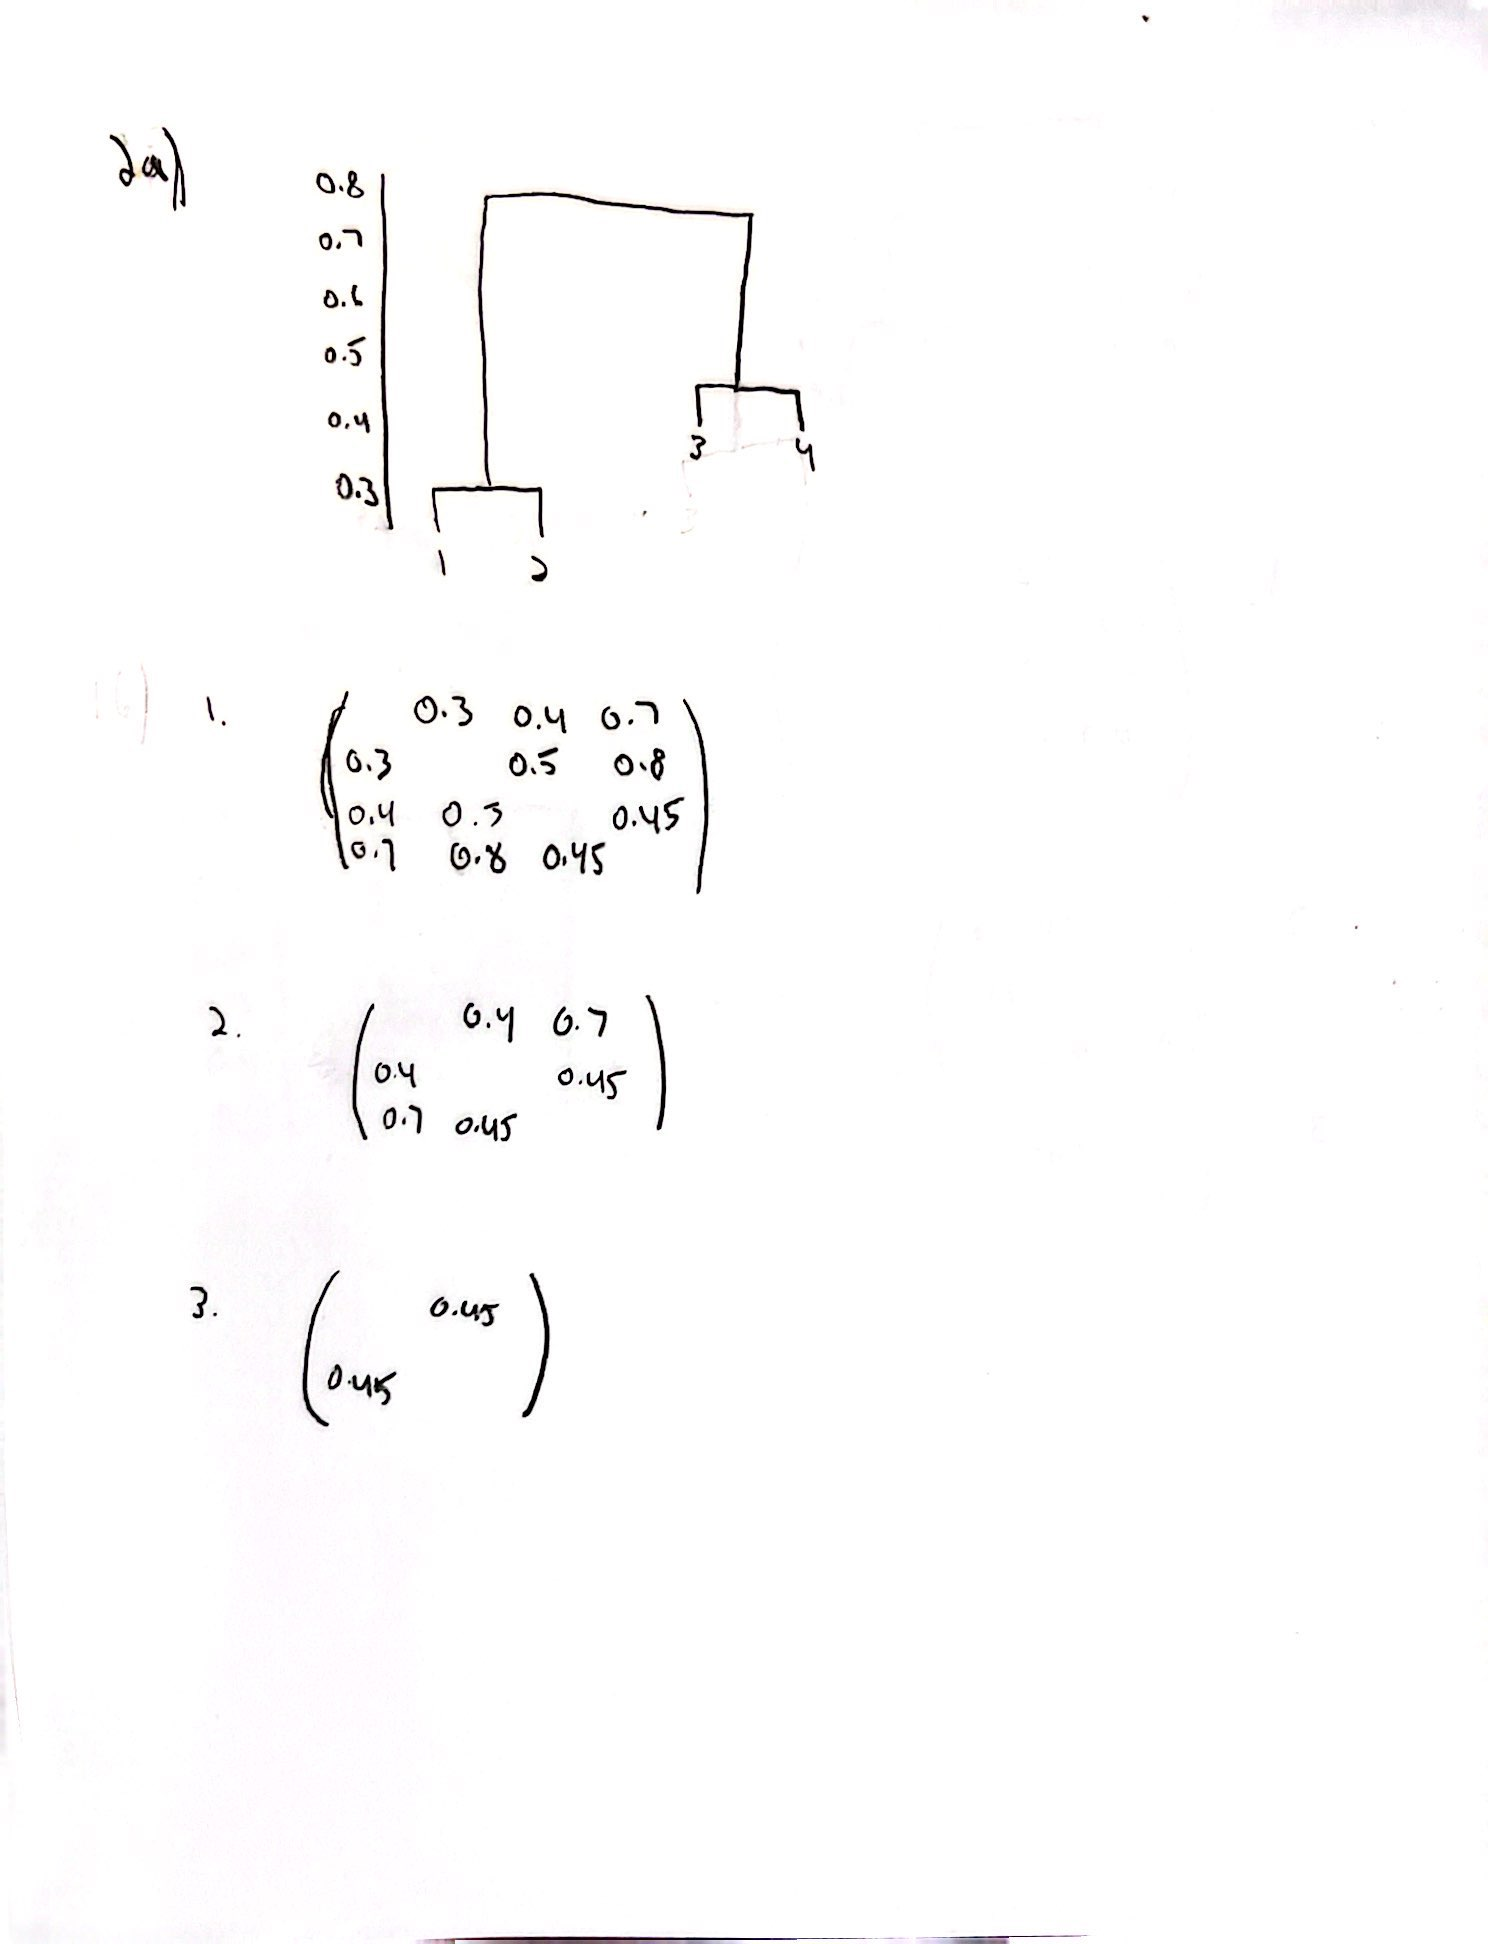

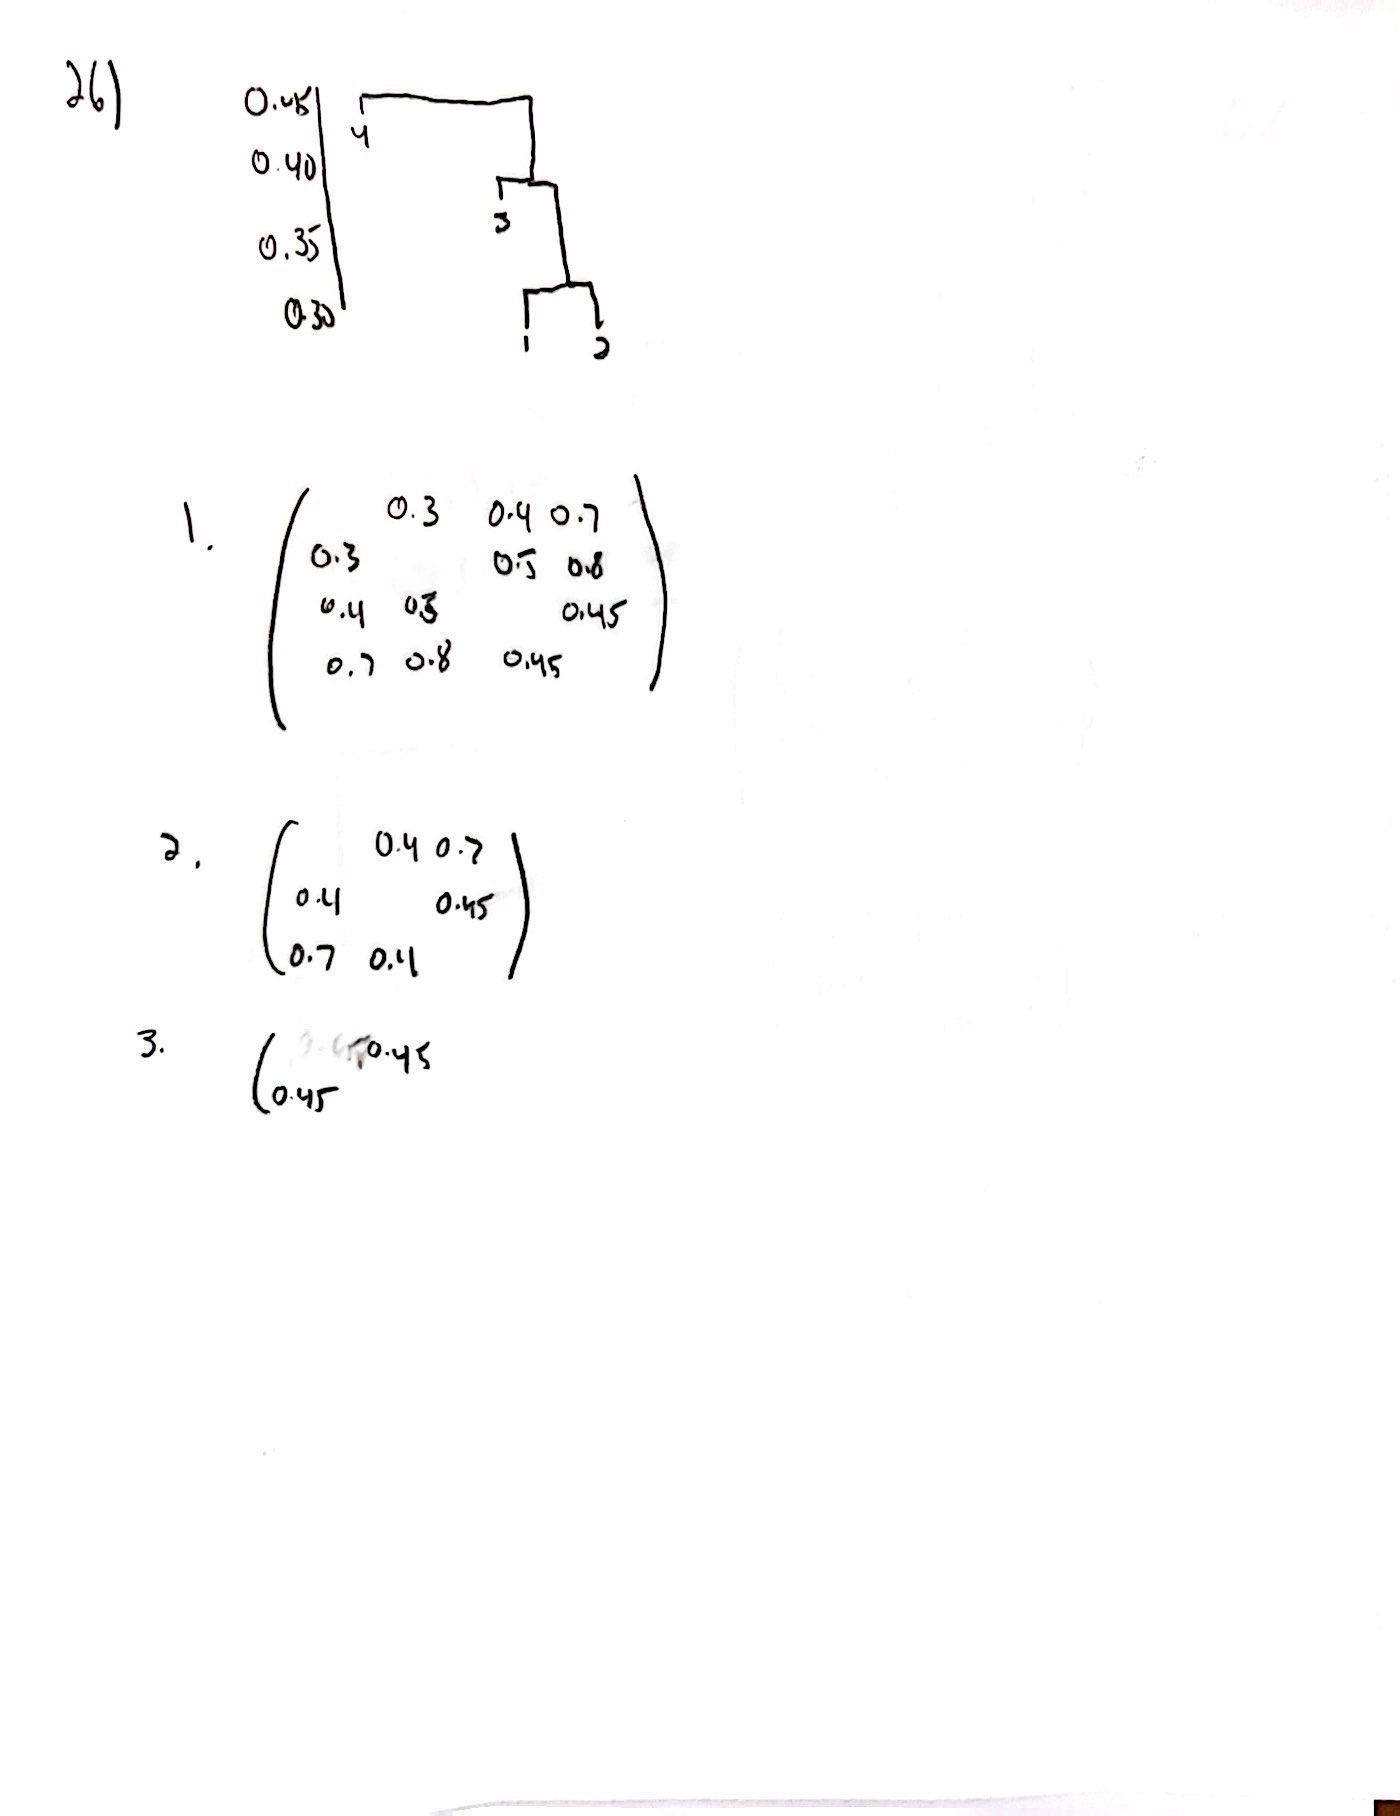

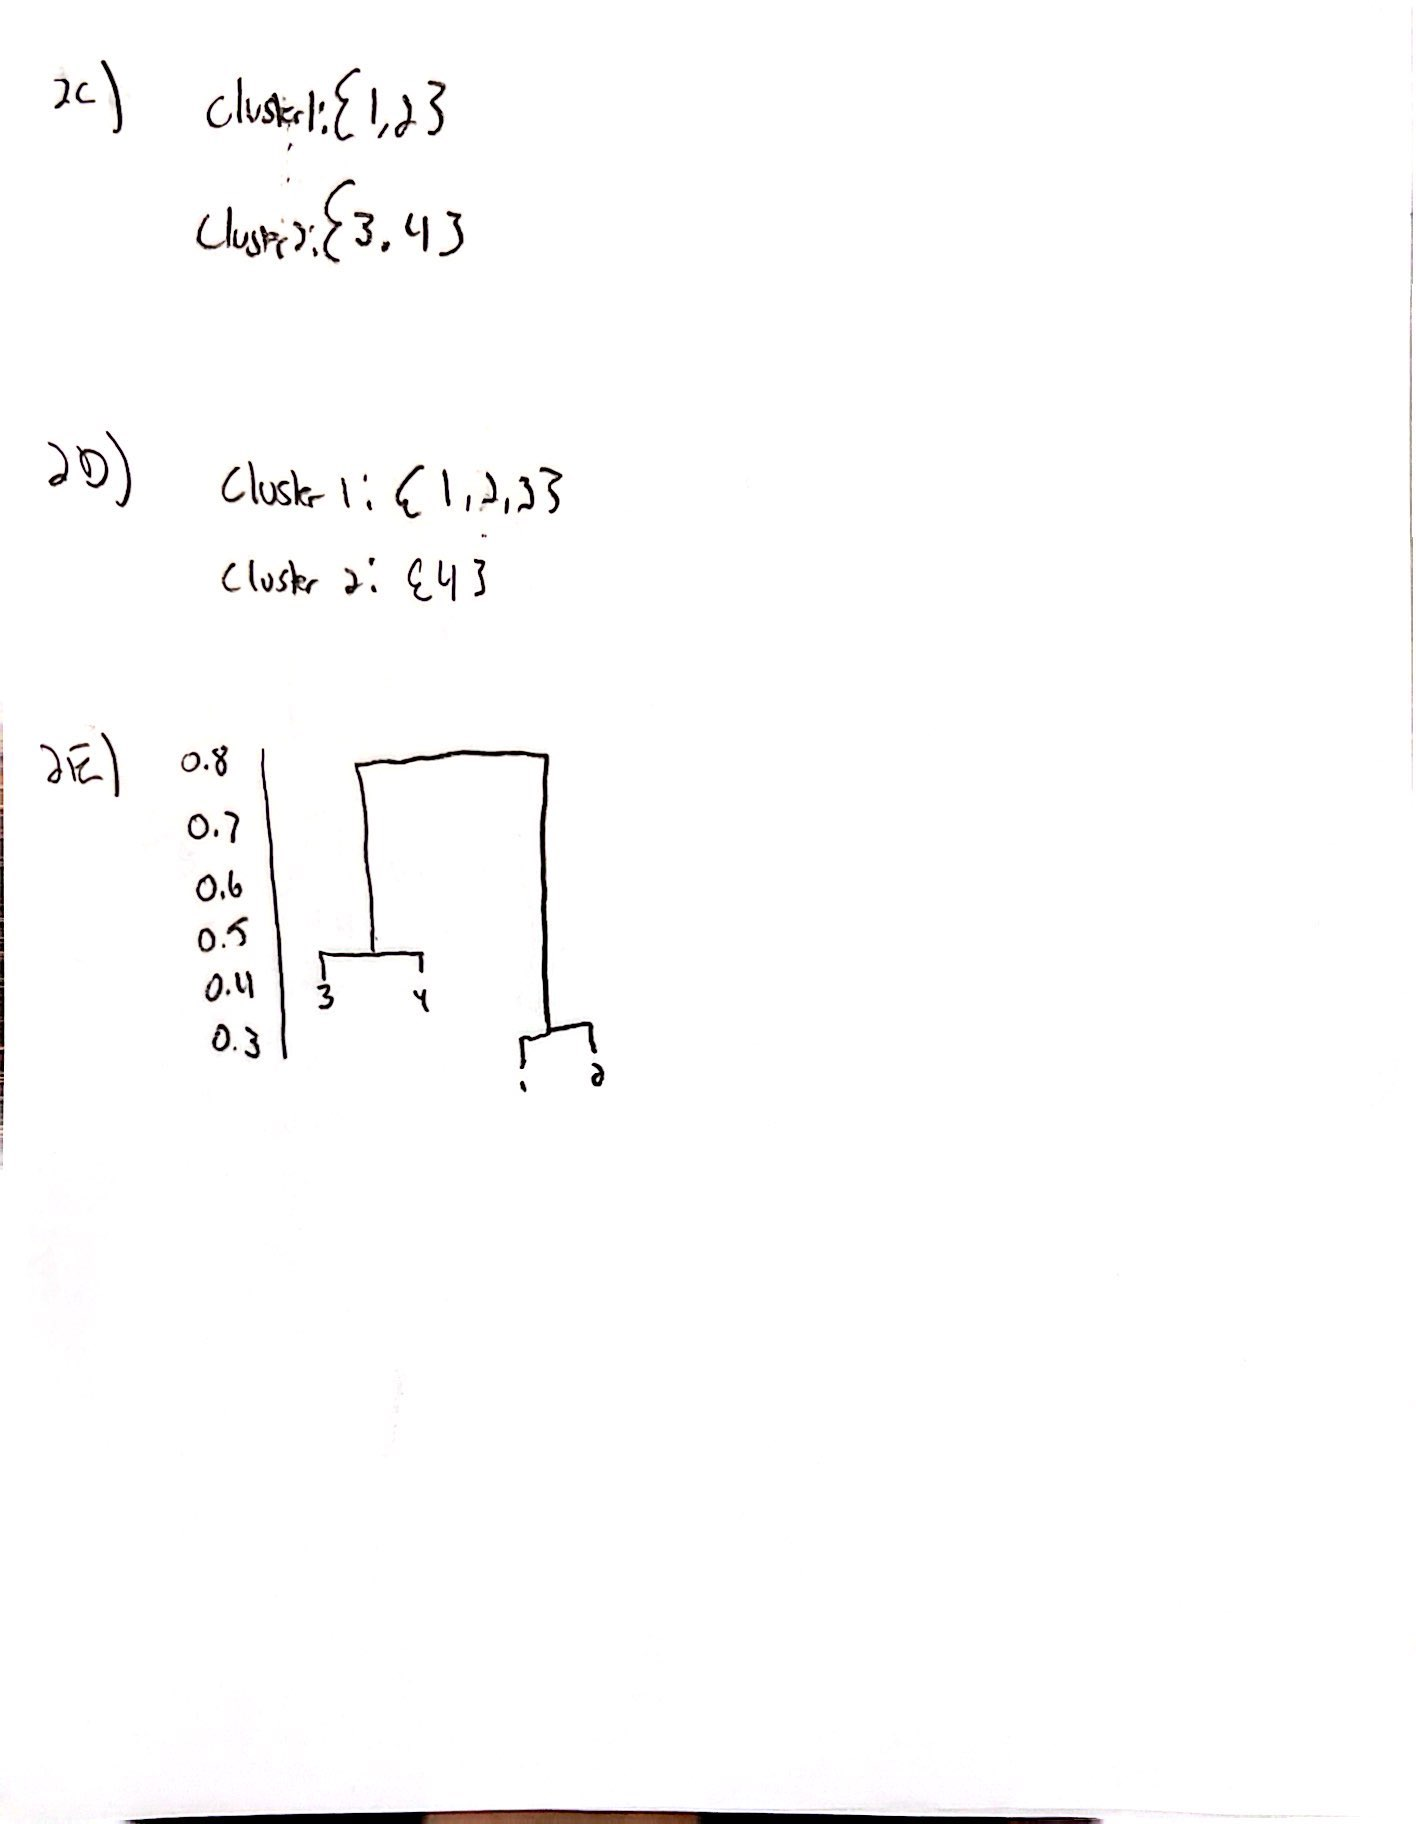